In [1]:
# load libraries and scripts
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl")
include("../scripts/plotting.jl")
include("../scripts/ps_analysis.jl");

In [2]:
#load borders
border, scale_factor = import_border("../data/borders/border.json")

dx = 0.005
grid = get_grid(border, dx);

In [3]:
#scatter(grid.coord[grid.isgrid,2],grid.coord[grid.isgrid,1])
#scatter!(grid.coord[grid.isborder,2],grid.coord[grid.isborder,1])

In [4]:
# compute or load grid parameters
contmod = get_params(grid, scale_factor, "../data/disc/pantagruel.h5", Niter=60,
    dmax = 2*dx, patch=4000.0, bmin=0.0, tau=0.00001);

  3.680125 seconds (3.77 M allocations: 16.983 GiB, 8.13% gc time, 4.85% compilation time)
  7.665664 seconds (4.28 M allocations: 5.681 GiB, 6.03% gc time, 23.39% compilation time)


In [4]:
#=
hm_plot(contmod, contmod.bx, cb_title = "", borders=[border])
savefig("../numerics/bx.svg")
hm_plot(contmod, contmod.by, cb_title = "", borders=[border])
savefig("../numerics/by.svg")
hm_plot(contmod, contmod.m, cb_title = "", borders=[border])
savefig("../numerics/m.svg")
hm_plot(contmod, contmod.d, cb_title = "", borders=[border])
savefig("../numerics/d.svg")
p2 = zeros(size(contmod.th))
p2[contmod.isgrid] .= contmod.p
hm_plot(contmod, p2, cb_title = "", borders=[border])
savefig("../numerics/p.svg")
=#
#hm_plot(contmod, contmod.by, cb_title = "\$b_y(x)\$", borders=[border])
#savefig("../numerics/by.svg")
#hm_plot(contmod, contmod.by, cb_title = "\$b_y(x)\$", borders=[border])
#savefig("../numerics/by.svg")
#hm_plot(contmod, contmod.th, cb_title = "\$\\theta(x)\$", borders=[border])

In [5]:
compute_stable_sol!(contmod, interval = 10000, Niter = 60000, tol = 1e-7);

[10000.0 8.967022522199386e-5]
[20000.0 1.6800455177490292e-5]
[30000.0 7.560721806187942e-6]
[40000.0 4.468156176606897e-6]
[50000.0 2.6686238524531447e-6]
[60000.0 1.6090509440402911e-6]
  6.097226 seconds (1.96 M allocations: 19.684 GiB, 5.97% gc time, 7.19% compilation time)


In [6]:
dm = load_discrete_model("../data/disc/pantagruel.h5", scale_factor)
#th = set_ref_phase!(contmod, vec(dm.coord[1,:]), th_ref = 0.0)
th_disc = get_discrete_values(contmod.coord[contmod.isgrid,:], dm.coord, contmod.th[contmod.isgrid]);

In [7]:
scatter(dm.th, th_disc)
th_min = minimum(dm.th)
th_max = maximum(dm.th)
plot!([th_min; th_max], [th_min; th_max], xlabel="\$\\theta_i^{\\rm ref}\$",
    ylabel="\$\\theta_i\$",color=:red, lw = 2, legend=false, size=(400,400), grid=false, aspect_ratio=:equal)
savefig("../numerics/theta_ref_vs_cont.pdf")

In [9]:
#thr = get_cont_values(isgrid, coord[isgrid,:], coord_disc, th_ref);

In [10]:
#heatmap(reshape(abs.(thr-th), Ny, Nx))

In [8]:
disc_plot(dm.coord, dm.th, borders=[border])
savefig("../numerics/disc_th.pdf")
#plot!(colorbar=true)
#plot!(clims=(0.0,1.0), c=:viridis, colorbar_title="cbar", grid=false)

In [9]:
hm_plot(contmod, contmod.th, cb_title = "\$\\theta(x)\$", borders=[border])
#hm_plot(contmod, contmod.th, cb_title = "\$\\theta(x)\$")
savefig("../numerics/cont_theta.svg")
#plot!(clims=(0.0,1.0), c=:viridis, colorbar_title="cbar", grid=false)

In [13]:
add_local_disturbance!(contmod, [-0.35; 0.24], -10.0, 0.02, dx);

In [32]:
ts, thetas, omegas = perform_dyn_sim(contmod, interval=10,
    Ndt=2000, dt=0.01, method="crank-nicolson");

Total time: 20.0
NIter: 10 Avg. Omega: -0.015713679287359766
NIter: 20 Avg. Omega: -0.025367746079503095
NIter: 30 Avg. Omega: -0.03423266332064737
NIter: 40 Avg. Omega: -0.044673542128927754
NIter: 50 Avg. Omega: -0.05538009736160812
NIter: 60 Avg. Omega: -0.06490312068358092
NIter: 70 Avg. Omega: -0.07466652545644005
NIter: 80 Avg. Omega: -0.08354857708342833
NIter: 90 Avg. Omega: -0.09194027410244654
NIter: 100 Avg. Omega: -0.10037904804926137
NIter: 110 Avg. Omega: -0.10970761604037052
NIter: 120 Avg. Omega: -0.11709789363747182
NIter: 130 Avg. Omega: -0.1221015534517782
NIter: 140 Avg. Omega: -0.12835745095946635
NIter: 150 Avg. Omega: -0.13723452386646504
NIter: 160 Avg. Omega: -0.14505353828486944
NIter: 170 Avg. Omega: -0.14981630626036818
NIter: 180 Avg. Omega: -0.1537613687427135
NIter: 190 Avg. Omega: -0.1557962409933229
NIter: 200 Avg. Omega: -0.15403896383405447
NIter: 210 Avg. Omega: -0.14852745965089684
NIter: 220 Avg. Omega: -0.14365755291725119
NIter: 230 Avg. Omega: -

In [15]:
sum(contmod.p)

-400000.00000000605

In [67]:
#hm_movie(contmod, ts, omegas, tstart = 0.0, tend = 20.0, interval = 1)
#c = [500 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000; -1000 -400] / scale_factor
c = [500 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000; -1000 -400] / scale_factor
time_plot(contmod, ts, omegas, c, borders = [border], tstart = 0.0, tend = 20.0)
savefig("../numerics/dyn.svg")

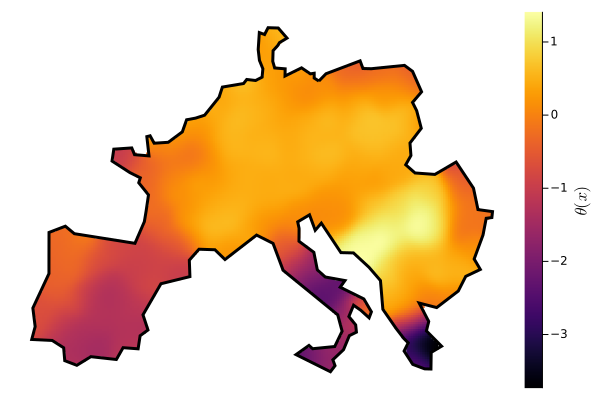

In [17]:
hm_plot(contmod, contmod.th, cb_title = "\$\\theta(x)\$", borders=[border])

In [18]:
println(size(thetas))
println(sum(contmod.isgrid))
println(size(contmod.th))

(14597, 51)
14597
(31365,)


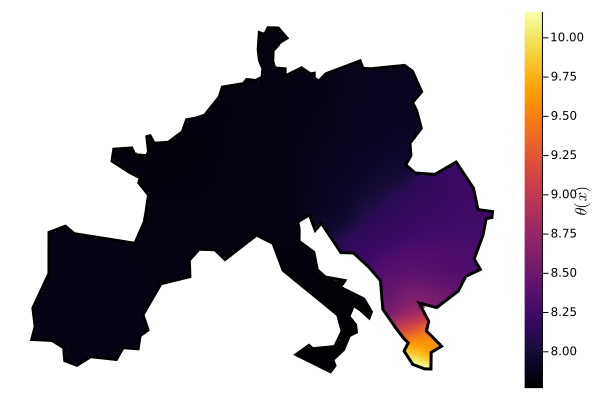

In [19]:
temp = zeros(size(contmod.th))
temp[contmod.isgrid] = thetas[:,end]

hm_plot(contmod, abs.(contmod.th-temp), cb_title = "\$\\theta(x)\$", borders=[border])